In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

#한글 깨짐 방지
if platform.system() == 'Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid')
    rc('font',family=font_name)

## 뉴욕 바이크 대여 기록 데이터 불러오기

In [3]:
df= pd.read_csv("Data/nyc_citibike.csv", encoding='euc-kr')
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


### 결측치 확인하기

#### to_frame() : 셀 실행 결과를 데이터프레임으로 보고 싶을 때 사용

In [4]:
df.isnull().sum().to_frame('nan_count')

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


### 범주형 변수, 연속형 변수 구분

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
start_date                 72035 non-null object
end_date                   72035 non-null object
start_hour                 72035 non-null int64
end_hour                   72035 non-null int64
trip_duration              72035 non-null int64
start_station_id           72035 non-null int64
start_station_name         72035 non-null object
start_station_latitude     72035 non-null float64
start_station_longitude    72035 non-null float64
end_station_id             72035 non-null int64
end_station_name           72035 non-null object
end_station_latitude       72035 non-null float64
end_station_longitude      72035 non-null float64
bike_id                    72035 non-null int64
usertype                   72035 non-null object
birth_year                 72035 non-null int64
gender                     72035 non-null object
day_since_register         72035 non-null int64
dtypes: float

#### 연속형 변수 : trip_duration, date_since_register

In [6]:
#연속형이 아닌데 연속형인 변수들 string 변환 : bike_id, end_station_id, start_station_id

df['bike_id']=df['bike_id'].astype(str)

df['start_station_id']= df['start_station_id'].astype(str)

df['end_station_id']= df['end_station_id'].astype(str)

df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## 데이터 도메인과 변수 이해

    1. 주행시간 변수
        : start_date, end_date, start_hour, end_hour, trip_duration
    
    2. 주행 위치 변수 
        : start_station_id, end_station_id, start_station_name,end_station_name,
          start_station_latitude, start_station_longitude, 
          end_station_latitude, end_station_longitude
    
    3. 대여 자전거 종류 변수 : bike_id
    
    4. 유저 정보 변수
        : usertype, birth_year, gender, day_since_register

### 1. 평균 trip_duration 구하기

In [7]:
df['trip_duration_min']=df['trip_duration']/60
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

평균 대여 시간 (분) : 17.4458 분

최소 대여 시간 : 1.01분

최대 대여 시간: 22107.7분 -> 이상치 존재 

#### seaborn 활용 Distribution 파악 - 단변수 plotting
    
    1. kdeplot : 확률 밀도가 추정되어 discrete 변수를 연속적으로 만들어줌
    2. distplot : kdeplot + histogram

#### 분포 파악시 체크 해야할 사항

    1. 정규분포를 따르는가/ 정규분포와 유사한 형태인가
    2. skewness 정도
    3. kurtosis 정도

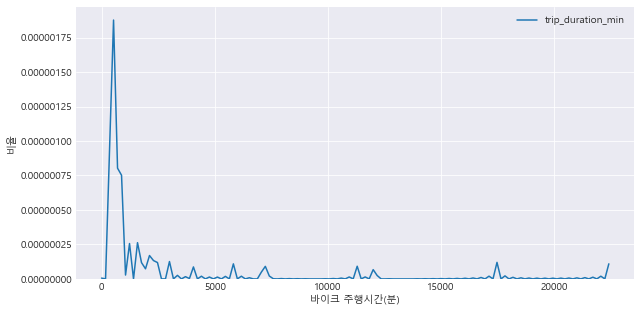

In [8]:
plt.figure(figsize=(10,5))

kde=sns.kdeplot(df['trip_duration_min'])
kde.set_xlabel('바이크 주행시간(분)')
kde.set_ylabel('비율')

plt.show()

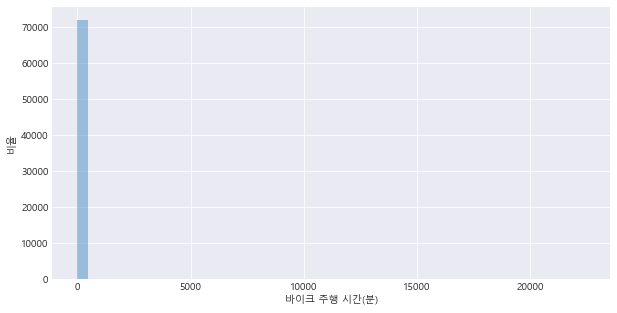

In [9]:
plt.figure(figsize=(10,5))
dist = sns.distplot(df['trip_duration_min'], kde=False)
dist.set_xlabel('바이크 주행 시간(분)')
dist.set_ylabel('비율')

plt.show()

#### 이상치 제거 
    
     y변수 분포의 아웃라이어
     : 이진 변수 분석에서 다른 변수들과의 관계를 볼때 분포가 늘어져 
      세밀하게 관찰불가
      
      -> 아웃라이어가 만들고자 하는 모델의 성능에 큰 영향을 미침

In [10]:
# y값 기준 최상위 !%값을 제거하는 방식
cut_point = df['trip_duration_min'].quantile(0.99)

df_cut = df[df['trip_duration_min']<cut_point]

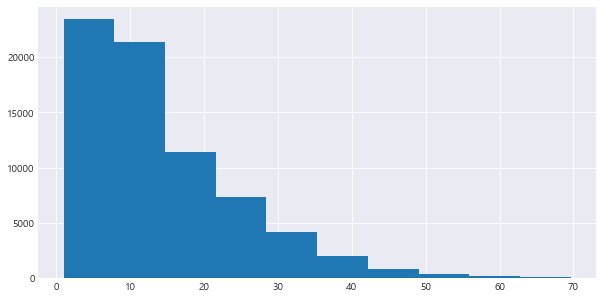

In [11]:
plt.figure(figsize=(10,5))
df_cut['trip_duration_min'].hist()
plt.show()

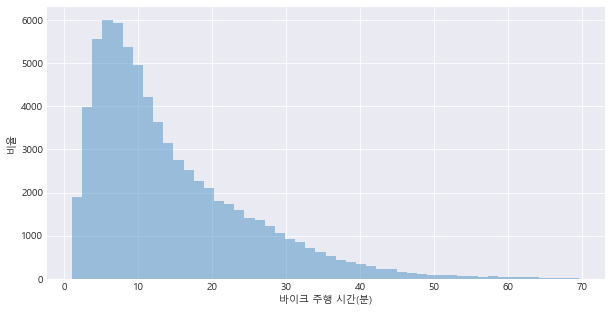

In [12]:
plt.figure(figsize=(10,5))
dist = sns.distplot(df_cut['trip_duration_min'], kde=False)
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show()

In [13]:
# skewness and kurtosis
print(f"Skewness: {df_cut['trip_duration_min'].skew()}")
print(f"kurtosis: {df_cut['trip_duration_min'].kurt()}")

Skewness: 1.4180106243305644
kurtosis: 2.3079835822424806


### 2. 가장 기록이 많은 start_hour 구하기

In [14]:
df_cut['start_hour'].value_counts()

18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
4       77
2       77
3       66
Name: start_hour, dtype: int64

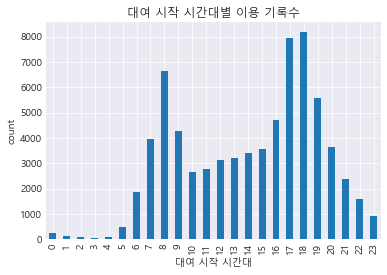

In [15]:
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록수')
plt.show()

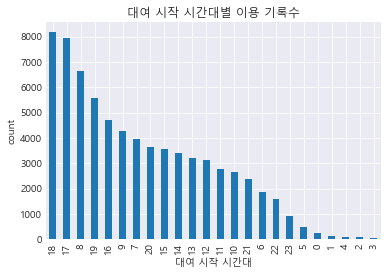

In [16]:
df_cut['start_hour'].value_counts().plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록수')
plt.show()

#### -> 18시 : 8227건으로 가장 대여기록이 많은 start_hour

#### 3. 유저들 성별 분포

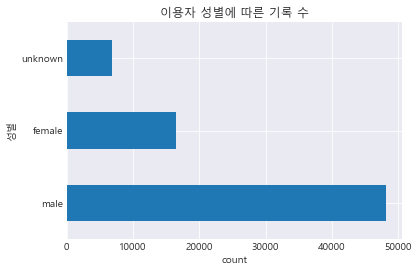

In [17]:
plt.figure()
df_cut['gender'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('성별')
plt.title('이용자 성별에 따른 기록 수')
plt.show()

In [18]:
df_cut['start_station_name'].value_counts().nlargest(10)

Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: start_station_name, dtype: int64

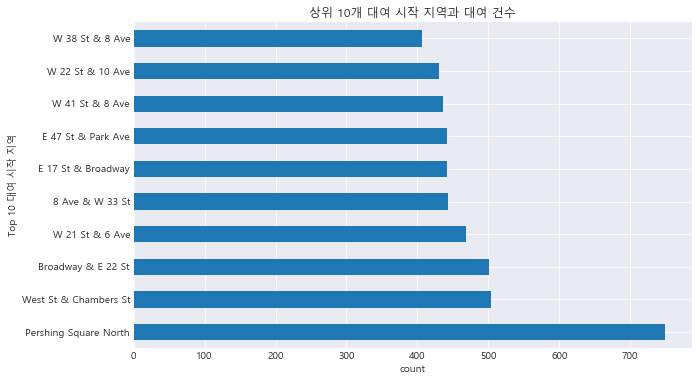

In [19]:
plt.figure(figsize=(10,6))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

## 이진 변수 분석 

![image](https://miro.medium.com/max/1400/0*n6dYwHB_ITI76LCE.png)

### 1. 연속형 - 연속형 변수 관계

    ex: 신규 가입자일 수록 주행시간이 더 짧을 수 있다.
    가설 검증 : 가입한 기간(x)와 주행시간(y)의 관계 파악
    
    -> Scatterplot 이용

<Figure size 720x360 with 0 Axes>

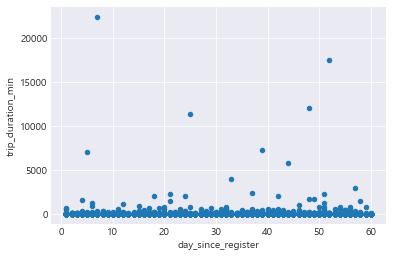

In [32]:
plt.figure(figsize=(10,5))
df.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()


#### seaborn regplot 이용

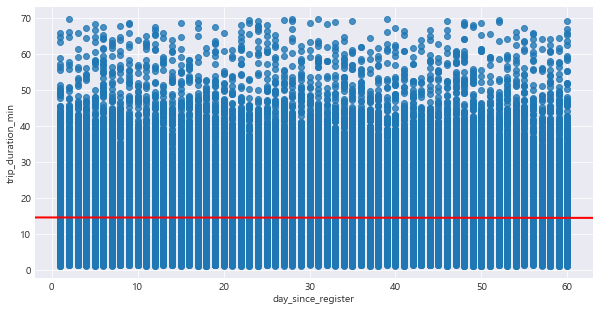

In [34]:
plt.figure(figsize=(10,5))
reg= sns.regplot(x='day_since_register',y='trip_duration_min', data=df_cut,
                line_kws={'color':'red','lw':2})
plt.show()

### 범주형 변수 - 범주형 변수 관계

    seaborn countplot 활용 
    
    변수 1: x축 or y축 
    변수 2: hue (색상으로 표현)

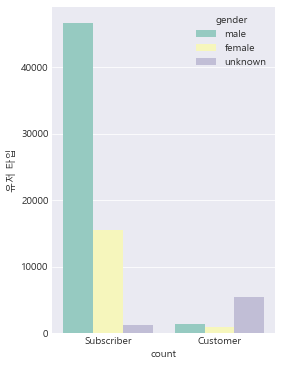

In [35]:
#성별 gender 별 usertype 분포
plt.figure(figsize=(4,6))
cnt = sns.countplot(x='usertype',hue='gender', data=df_cut, palette='Set3')
cnt.set_xlabel('count')
cnt.set_ylabel('유저 타입')
plt.show()

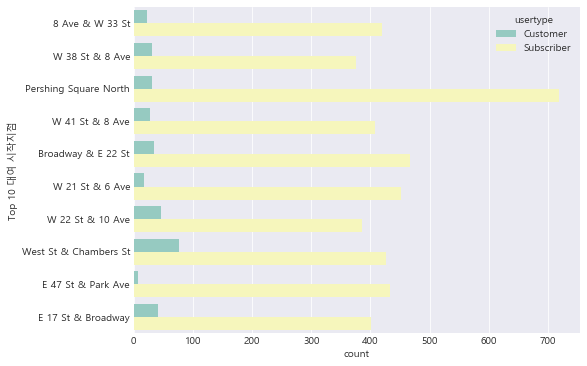

In [39]:
# 상위 10개 시작 지점으로 기록 건수만 남겨 df_top으로 생성
top_list = df_cut['start_station_name'].value_counts().nlargest(10).index
dt_top= df_cut[df_cut['start_station_name'].isin(top_list)]

# 상위 대여 시작 지점별 usertype 분포
plt.figure(figsize=(8,6))
cnt= sns.countplot(y='start_station_name', data=dt_top, hue='usertype', palette='Set3')
cnt.set_xlabel('count')
cnt.set_ylabel('Top 10 대여 시작지점')
plt.show()

### 범주형 변수 - 연속형 변수 관계

    1. 범주형 변수가 10개 이하 - Seaborn의 boxplot
    
    2. 범주형 변수가 10개 이상 - 상위, 하위 10개로 자르고 Horizontal로 시각회

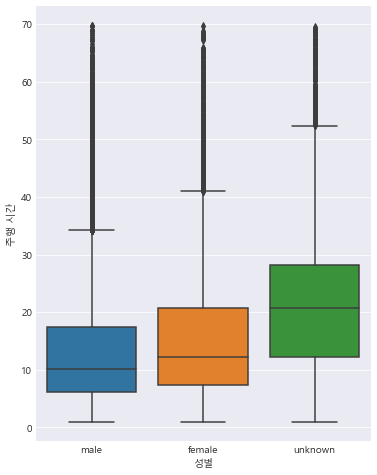

In [42]:
# 성별 gender 와 주행 시간 trip_duration
plt.figure(figsize=(6,8))
box=sns.boxplot(x='gender', y='trip_duration_min', data=df_cut)
box.set_xlabel("성별")
box.set_ylabel("주행 시간")
plt.show()

#### Seaborn 의 catplot

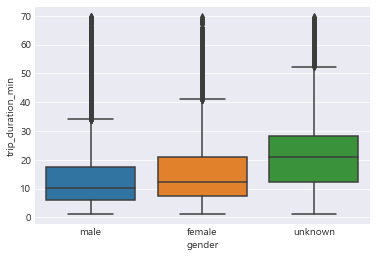

In [45]:
sns.boxplot(x='gender', y='trip_duration_min', data=df_cut)
plt.show()

### 범주형 변수가 10개 이상 - 상위, 하위 데이터만 horizontal로 시각화

In [47]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top 생성
top_list = df_cut['start_station_name'].value_counts().nlargest(10).index
df_top = df_cut[df_cut['start_station_name'].isin(top_list)]

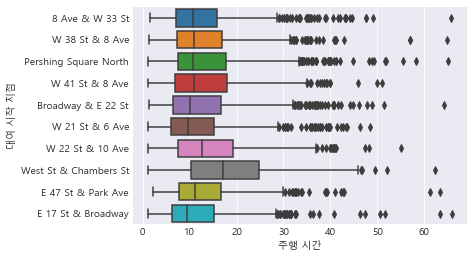

In [48]:
box = sns.boxplot(y='start_station_name', x='trip_duration_min', data=df_top)
box.set_xlabel('주행 시간')
box.set_ylabel('대여 시작 지점')
plt.show()

##  3개 이상의 변수 분석

### 버블도 (Bubbple Scatter Chart, Bubble Plot)

    : 일반 scatterplot 처럼 x, y 관계를 나타내지만, 버블의 크기, 색상 정보 포함
    
    변수 : x, y, 크기, 컬러

#### 상위 top 10개 시작 지역/ 시작 시간대 별 / 주행시간

Text(0, 0.5, 'Top 10 시작 시간대')

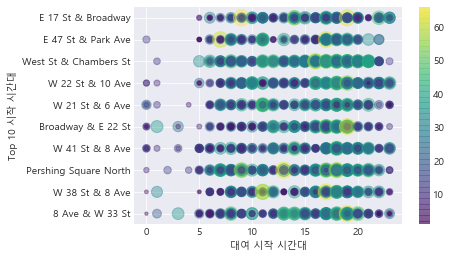

In [54]:
plt.scatter(x=df_top['start_hour'], y=df_top['start_station_name'], 
            c = df_top['trip_duration_min'],s= 4*df_top['trip_duration_min'],cmap='viridis', alpha=0.4)
plt.colorbar()
plt.xlabel('대여 시작 시간대')
plt.ylabel('Top 10 시작 시간대')

### 히트맵(HeatMap) 활용

In [60]:
#heatmap -base 활용
base=df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


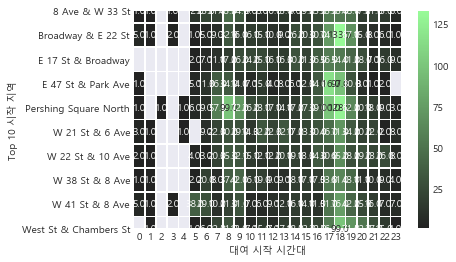

In [62]:
pal= sns.dark_palette('palegreen',as_cmap=True)
sns.heatmap(base, annot=True,  linewidths=.5, fmt='.1f', cmap=pal)
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
plt.show()